## Context:
### Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well  
Study the data distribution in each attribute, share your findings. (10 points)  
Get the target column distribution. Your comments  
Split the data into training and test set in the ratio of 70:30 respectively
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)  
Print the confusion matrix for all the above models (10 points)  
Give your reasoning on which is the best model in this case and why it performs better? (10 points)

#### Data Description:	
	
ID: Customer ID  
Age: Customer's age in completed years  
Experience: #years of professional experience  
Income: Annual income of the customer(dollar)
ZIPCode: Home Address ZIP code  
Family: Family size of the customer  
CCAvg: Avg. spending on credit cards per month(dollar)  
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  
Mortgage: Value of house mortgage if any(dollar)  
Personal Loan: Did this customer accept the personal loan offered in the last campaign?  
Securities Account: Does the customer have a securities account with the bank?  
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?  
Online: Does the customer use internet banking facilities?  
CreditCard: Does the customer use a credit card issued by UniversalBank?  

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
# importing all basic libraries

In [58]:
credit_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
# loading the data

In [59]:
credit_df.head(10)
# seeing head of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [60]:
credit_df.info()
# checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [61]:
credit_df['Personal Loan'].value_counts()
# this data is having heavily unbalanced class representation, i.e. only 9.6% of the data is of prople who accepted loan 

0    4520
1     480
Name: Personal Loan, dtype: int64

In [62]:
credit_df.set_index('ID',inplace=True)
# setting Id column as the index for dataframe
credit_df['Personal Loan'] = credit_df['Personal Loan'].astype('category')
# converting target variable into category
credit_df['ZIP Code'] = credit_df['ZIP Code'].astype('str')
# converting ZIP code into string so that it is not considered for numerical stats analysis

In [63]:
credit_df.isnull().sum()
# checking for null values

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [64]:
credit_df.nunique()
# checking unique values in each column

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [65]:
credit_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


Min value for 'Experience' column is in negative, so this column needs data cleaning.

In [66]:
credit_df[credit_df['Experience']<0]['Experience'].value_counts()
# checking how many values are negative under 'Experience' column along with the values

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

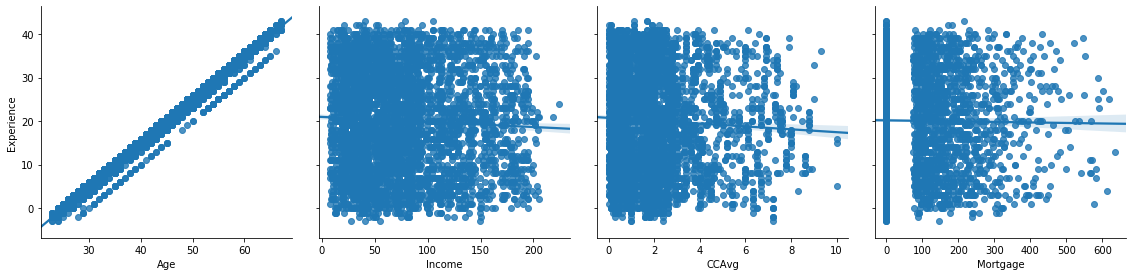

In [67]:
grid = sns.PairGrid(credit_df, y_vars = 'Experience', x_vars = ['Age', 'Income','CCAvg', 'Mortgage'], height = 4)
grid.map(sns.regplot);
# finding a quantitive variable with strong association with 'Experience'

We can see that 'Age' has a very strong association with 'Experience'.

In [68]:
credit_df[credit_df['Experience'] < 0]['Age'].value_counts()
# getting the subset of 'Age' data with negative 'Experience'

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

The subset of each age with negative values in 'Experience' is small.
We can replace each negative 'Experience' value with the median of positive 'Experience' value associated with the particular 'Age' value.

In [69]:
ages = credit_df[credit_df['Experience'] < 0]['Age'].unique().tolist()
# list of 'Age' values where we found negative values in 'Experience'
indexes = credit_df[credit_df['Experience'] < 0].index.tolist()
# indexes of negative values in 'Experience'
for i in indexes:
    for j in ages:
        credit_df.loc[i,'Experience'] = credit_df[(credit_df.Age == j) & (credit_df.Experience > 0)]['Experience'].median()

In [70]:
credit_df[credit_df['Experience']<0]['Experience'].count()
# checking if imputation happened successfully

0

In [71]:
credit_df.Experience.describe()
# checking updated desriptive stats for 'Experience' column

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

The data is now clean.

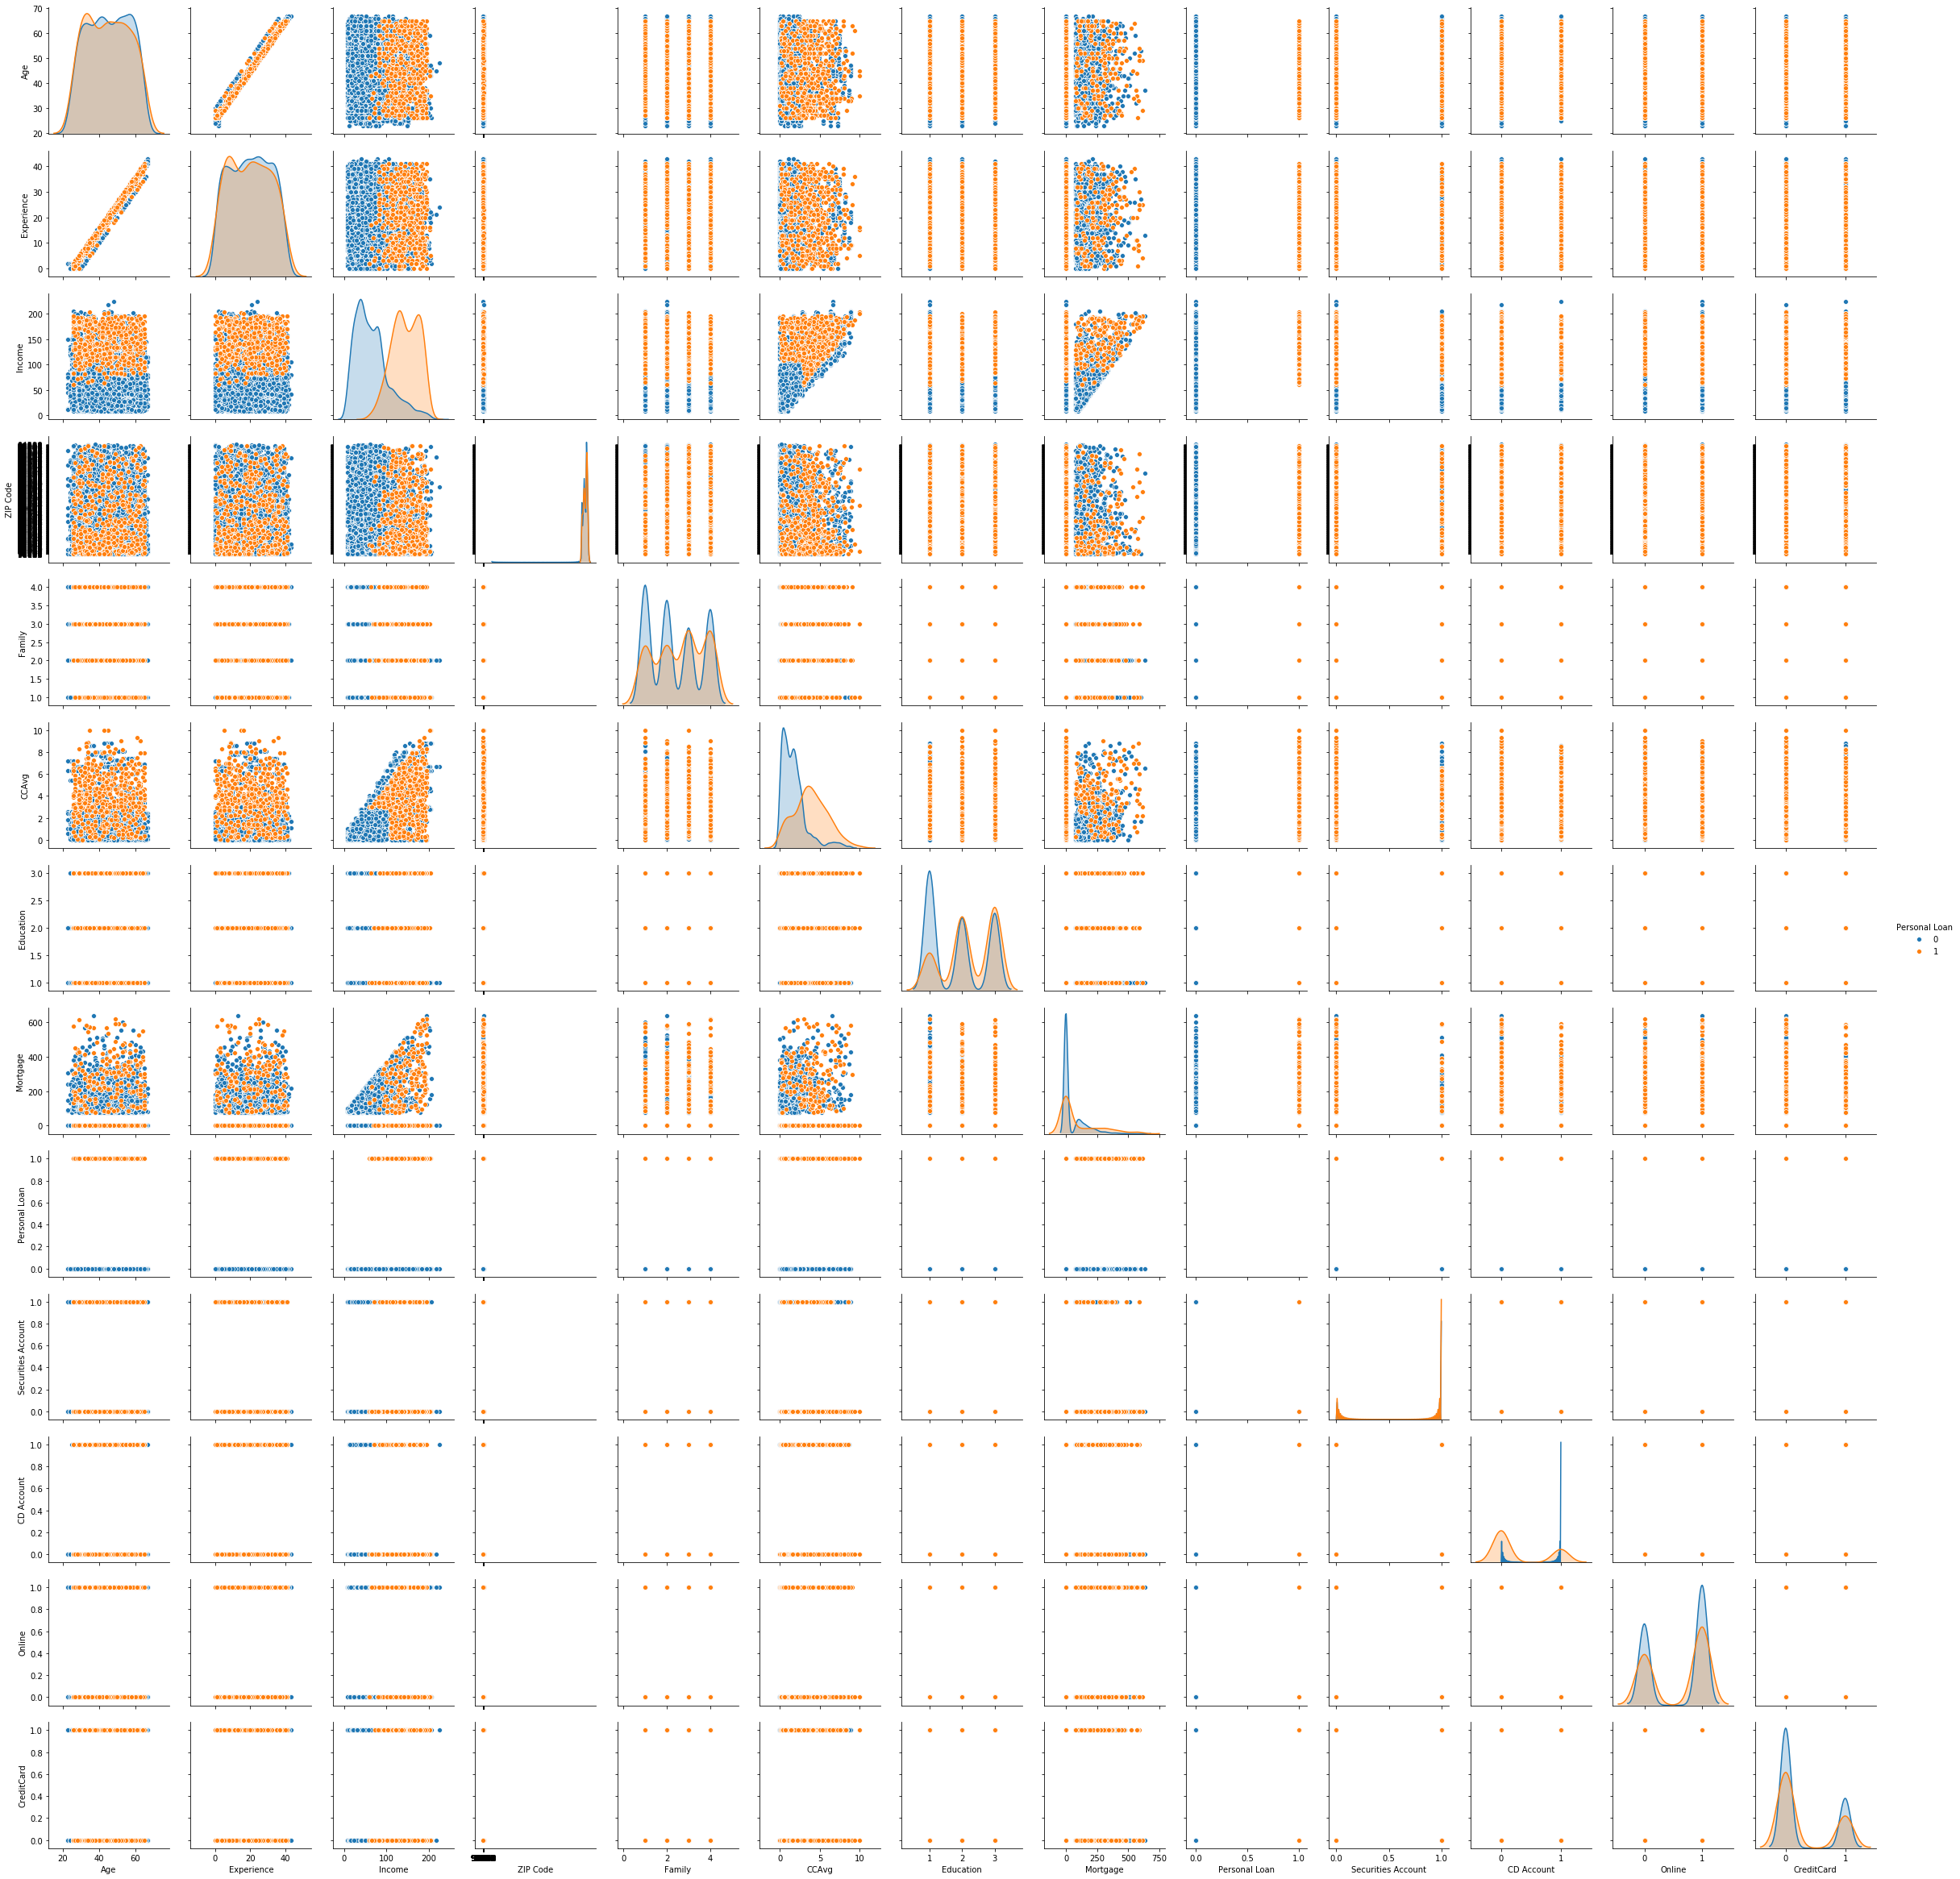

In [16]:
sns.pairplot(credit_df, hue = 'Personal Loan')

##### Observations

'Age' is seen to be highly postively correlated to 'Experience'.
Higher 'Age' group people seem to have a higher 'Income'.

Classification - 
Visually only 'Income' & 'CCAvg' seems to good features for differentiating/classifying the personal loan target variable.
Rest attributes are not visually classifying the loan classes clearly.

In [72]:
credit_df.skew()

Age                   -0.029341
Experience            -0.007455
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

The features with positive values of skew indicates data is skewed towards right in those features. The negative values of skew indicates data is skewed towards left in those features.

In [87]:
credit_df.kurtosis()

Age                    -1.153067
Experience             -1.147295
Income                 -0.044244
ZIP Code              486.204272
Family                 -1.403586
CCAvg                   2.646706
Education              -1.546116
Mortgage                4.756797
Securities Account      4.701013
CD Account             11.633404
Online                 -1.844883
CreditCard             -1.182191
dtype: float64

High kurtosis values indicate that the feature has heavy tails, or outliers.

#### EDA

QUANTATIVE VARIABLES:

['Age', 'Income', 'CCAvg', 'Mortgage']

In [74]:
quant_df = credit_df[['Age', 'Income', 'Experience', 'CCAvg', 'Mortgage','Personal Loan']]
# copying the quantitative variables into a different dataframe

In [75]:
quant_df.corr()
# checking correlation 

,Age,Income,Experience,CCAvg,Mortgage
Age,1.000000,-0.055269,0.993922,-0.052012,-0.012539
Income,-0.055269,1.000000,-0.047024,0.645984,0.206806
Experience,0.993922,-0.047024,1.000000,-0.049865,-0.011104
CCAvg,-0.052012,0.645984,-0.049865,1.000000,0.109905
Mortgage,-0.012539,0.206806,-0.011104,0.109905,1.000000


There's a strong correlation between 'Age' and 'Experience', so we'll not consider 'Experience' in further steps to avoid multicollinearity.

We've seen earlier that the data is unbalanced, where only 480/5000 records are for the class representing people who accepted the personal loan. Hence, we need to focus on better recall of Class value '1' (accepted loan) for the prediction model.

### Models

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# importing all the required models and metrics needed to evaluate the models

##### Train-Test Split

In [77]:
# defining the independent & target variables/features
X = credit_df.drop(['Experience','Personal Loan'],axis=1)
y = credit_df.pop('Personal Loan')
# splitting the data into training and testing sets
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

#### KNN Classifier

In [78]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [79]:
# looping over different values of neighbors and random state 
neighbors = np.arange(1,50,2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(10):
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(scaledX_train,y_train)
        train.append(accuracy_score(model_knn.predict(scaledX_train),y_train))
        test.append(accuracy_score(model_knn.predict(scaledX_test),y_test))
    train_accuracy_plot[i] = np.mean(train)
    test_accuracy_plot[i] = np.mean(test)

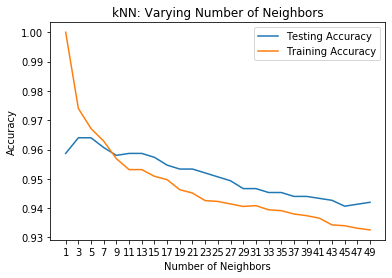

In [80]:
# generating score plot
plt.title('kNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.show()

In [81]:
# finding optimal k using Mis-classification error
mse = [1-x for x in test_accuracy_plot] # Changing to mis classification error
optimal_k = neighbors[mse.index(min(mse))] # determing best k
print("Answer :The optimal no. of neighbors is {}".format(optimal_k))

Answer :The optimal no. of neighbors is 3


In [82]:
print("Accuracy score of the KNN Classifer is:",round(test_accuracy_plot[1],2))
print("\nConfusion matrix for the KNN Classifier is below:\n\n",confusion_matrix(y_test, model_knn.predict(scaledX_test)))
print("\nClassification report for the KNN Classifier is below:\n\n",classification_report(y_test, model_knn.predict(scaledX_test)))

Accuracy score of the KNN Classifer is: 0.96

Confusion matrix for the KNN Classifier is below:

 [[1368    4]
 [  83   45]]

Classification report for the KNN Classifier is below:

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1372
           1       0.92      0.35      0.51       128

    accuracy                           0.94      1500
   macro avg       0.93      0.67      0.74      1500
weighted avg       0.94      0.94      0.93      1500



#### Logistic Regression Classifier

In [83]:
model_lr = LogisticRegression(random_state=seed)
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
print("Accuracy score of the Logistic Regression Classifer is:",round(accuracy_score(y_test, model_lr.predict(scaledX_test)),2))
print("\nConfusion matrix for the Logistic Regression Classifier is below:\n\n",confusion_matrix(y_test, model_lr.predict(scaledX_test)))
print("\nClassification report for the Logistic Regression Classifier is below:\n\n",classification_report(y_test, model_lr.predict(scaledX_test)))

Accuracy score of the Logistic Regression Classifer is: 0.64

Confusion matrix for the Logistic Regression Classifier is below:

 [[843 529]
 [  4 124]]

Classification report for the Logistic Regression Classifier is below:

               precision    recall  f1-score   support

           0       1.00      0.61      0.76      1372
           1       0.19      0.97      0.32       128

    accuracy                           0.64      1500
   macro avg       0.59      0.79      0.54      1500
weighted avg       0.93      0.64      0.72      1500



#### Naive's Bayes (Gaussian) Classifier

In [85]:
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
print("Accuracy score of the Naive's Bayes (Gaussian) Classifer is:",round(accuracy_score(y_test, model_nb.predict(scaledX_test)),2))
print("\nConfusion matrix for the Naive's Bayes (Gaussian) Classifier is below:\n\n",confusion_matrix(y_test, model_nb.predict(scaledX_test)))
print("\nClassification report for the Naive's Bayes (Gaussian) Classifier is below:\n\n",classification_report(y_test, model_nb.predict(scaledX_test)))

Accuracy score of the Naive's Bayes (Gaussian) Classifer is: 0.91

Confusion matrix for the Naive's Bayes (Gaussian) Classifier is below:

 [[1325   47]
 [  92   36]]

Classification report for the Naive's Bayes (Gaussian) Classifier is below:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1372
           1       0.43      0.28      0.34       128

    accuracy                           0.91      1500
   macro avg       0.68      0.62      0.65      1500
weighted avg       0.89      0.91      0.90      1500



### Comparison of models

In [103]:
models = []
models.append(model_knn)
models.append(model_lr)
models.append(model_nb)

In [105]:
acc_score_list = []
for mod in models:
    y_prd = mod.predict(scaledX_test)
    acc_score = accuracy_score(y_test,y_prd)
    acc_score_list.append(acc_score)
    print("Accuracy Score of {} is {}".format(mod,acc_score_list[-1]))

Accuracy Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform') is 0.942
Accuracy Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.6446666666666667
Accuracy Score of GaussianNB(priors=None, var_smoothing=1e-09) is 0.9073333333333333


In [110]:
from sklearn.metrics import recall_score
rec_score_list = []
for mod in models:
    y_prd = mod.predict(scaledX_test)
    rec_score = recall_score(y_test,y_prd)
    rec_score_list.append(rec_score)
    print("Recall for {} is {}".format(mod,rec_score_list[-1]))

Recall for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform') is 0.3515625
Recall for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is 0.96875
Recall for GaussianNB(priors=None, var_smoothing=1e-09) is 0.28125


#### Conclusion:

Since Logistic Regression model has the highest recall for Class 1 (person opting for personal loan) - 96% with an overall accuracy of 64%, it will be considered as the best fit here. The other models have a much higher overall accuracy, but they have meagre recall for the preferred target Class (35% & 28%).

##### Logisitic Regression is the best fit model for this data to identify potential customers who will opt for a personal loan.